# Jamboree Education - Linear Regression

## Jamboree Education
Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective. 

**Column Profiling:**

- Serial No. (Unique row ID)
- GRE Scores (out of 340)
- TOEFL Scores (out of 120)
- University Rating (out of 5)
- Statement of Purpose and Letter of Recommendation Strength (out of 5)
- Undergraduate GPA (out of 10)
- Research Experience (either 0 or 1)
- Chance of Admit (ranging from 0 to 1)


**Problem Statment:** Predict the chances of graduate admission based on the given features.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from statsmodels.stats.outliers_influence import variance_inflation_factor

import scipy as sp


## Load The DataSet

In [2]:
ds = pd.read_csv("Jamboree_Admission.csv")

## Observations On DataSet

In [3]:
ds.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# shape of data set
ds.shape

(500, 9)

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
# data types of attributes of the data set
ds.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [7]:
# check for missing values
ds.isnull()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False


In [8]:
# check for missing values
ds.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [9]:
# statistical summary
ds.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


## Exploratory Data Analysis

In [10]:
cat_cols = ['University Rating', 'SOP', 'LOR ', 'Research']
num_cols = ['GRE Score', 'TOEFL Score', 'CGPA']
target = 'Chance of Admit '

## Univariate Analysis

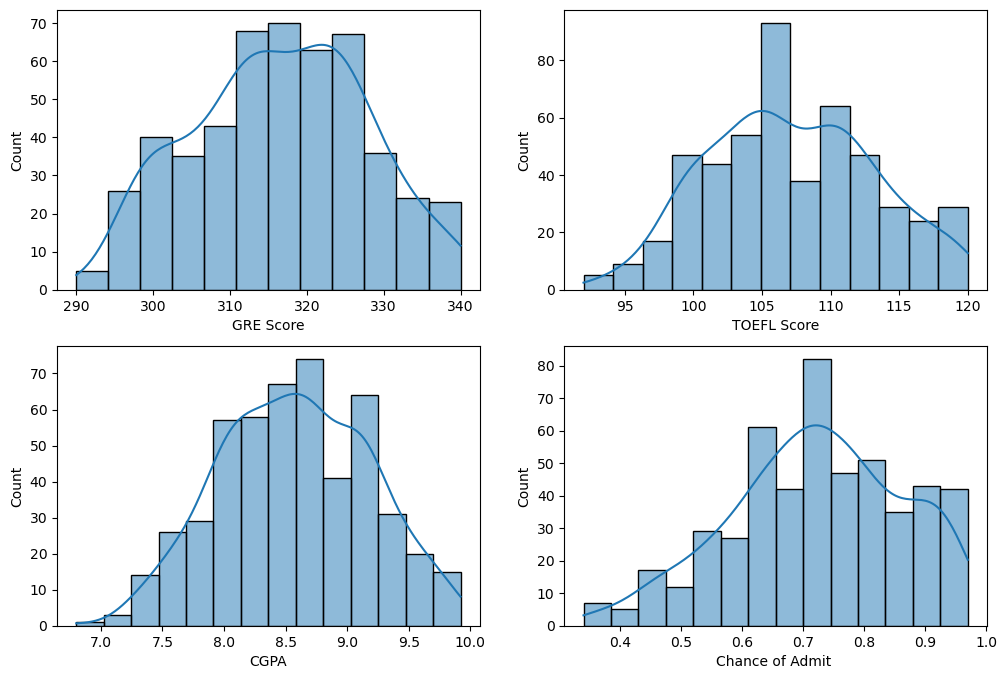

In [11]:
# check distribution of each numerical variable

rows, cols = 2, 2

fig, axs = plt.subplots(rows,cols, figsize=(12, 8))

sns.histplot(ds[num_cols[0]],kde=True, ax = axs[0,0])

sns.histplot(ds[num_cols[1]],kde=True, ax = axs[0,1])
        
sns.histplot(ds[num_cols[-1]], kde=True, ax=axs[1,0])

sns.histplot(ds[target], kde=True, ax=axs[1,1])

plt.show()

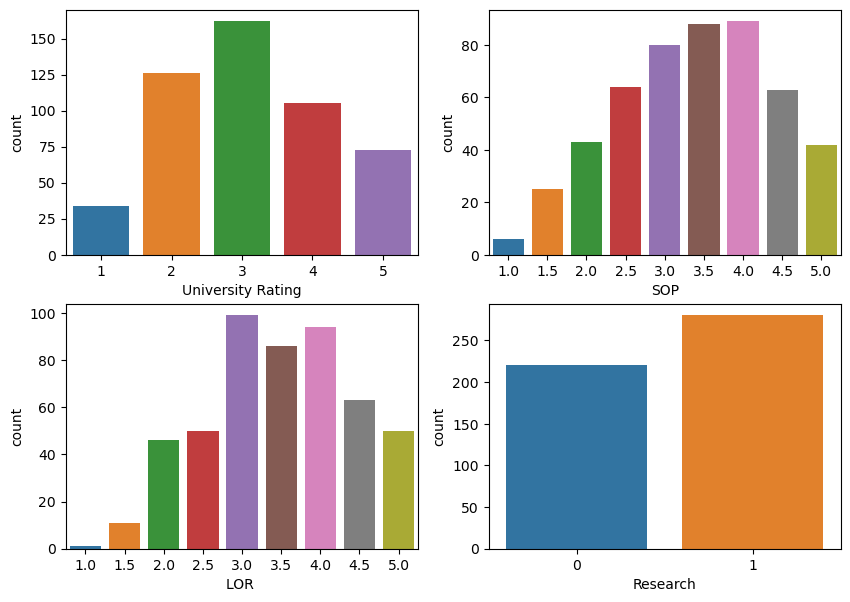

In [12]:
# Countplots for categorical variables

cols, rows = 2, 2

fig, axs = plt.subplots(rows, cols, figsize=(10, 7))

index = 0

for row in range(rows):
    for col in range(cols):
        sns.countplot(x=cat_cols[index], data=ds, ax=axs[row, col], alpha=1)
        index += 1
        
plt.show()

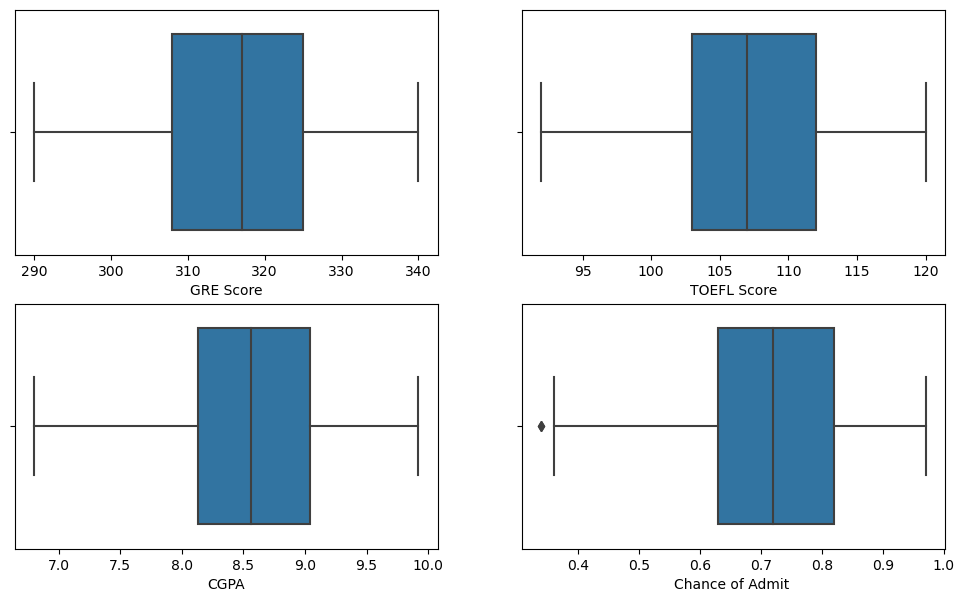

In [13]:
# Checking Outliers Using BoxPlots

rows, cols = 2, 2

fig, axs = plt.subplots(rows,cols, figsize=(12, 7))

sns.boxplot(x=num_cols[0], data = ds, ax = axs[0,0])

sns.boxplot(x=num_cols[1], data = ds, ax = axs[0,1])
        
sns.boxplot(x=num_cols[2], data = ds, ax = axs[1,0])

sns.boxplot(x= target, data = ds, ax = axs[1,1])

plt.show()

## Bivariate Analysis

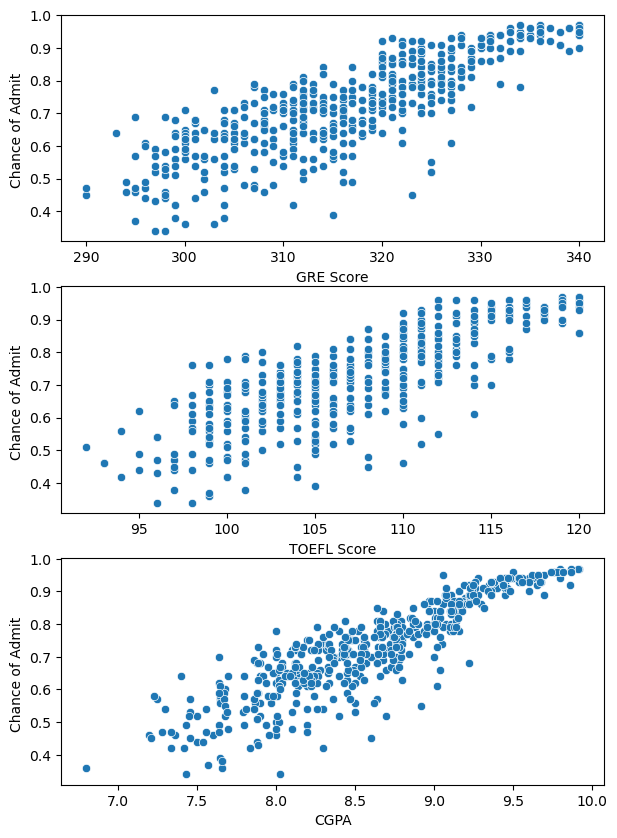

In [14]:
# check relation bw continuous variables & target variable

fig, axs = plt.subplots(3,1, figsize=(7,10))

sns.scatterplot(x=num_cols[0], y=target, data=ds, ax=axs[0])

sns.scatterplot(x=num_cols[1], y=target, data=ds, ax=axs[1])

sns.scatterplot(x=num_cols[2], y=target, data=ds, ax=axs[2])

plt.show()

### Insights
- We can say that the continuos variables and target variables are linearly correalted.

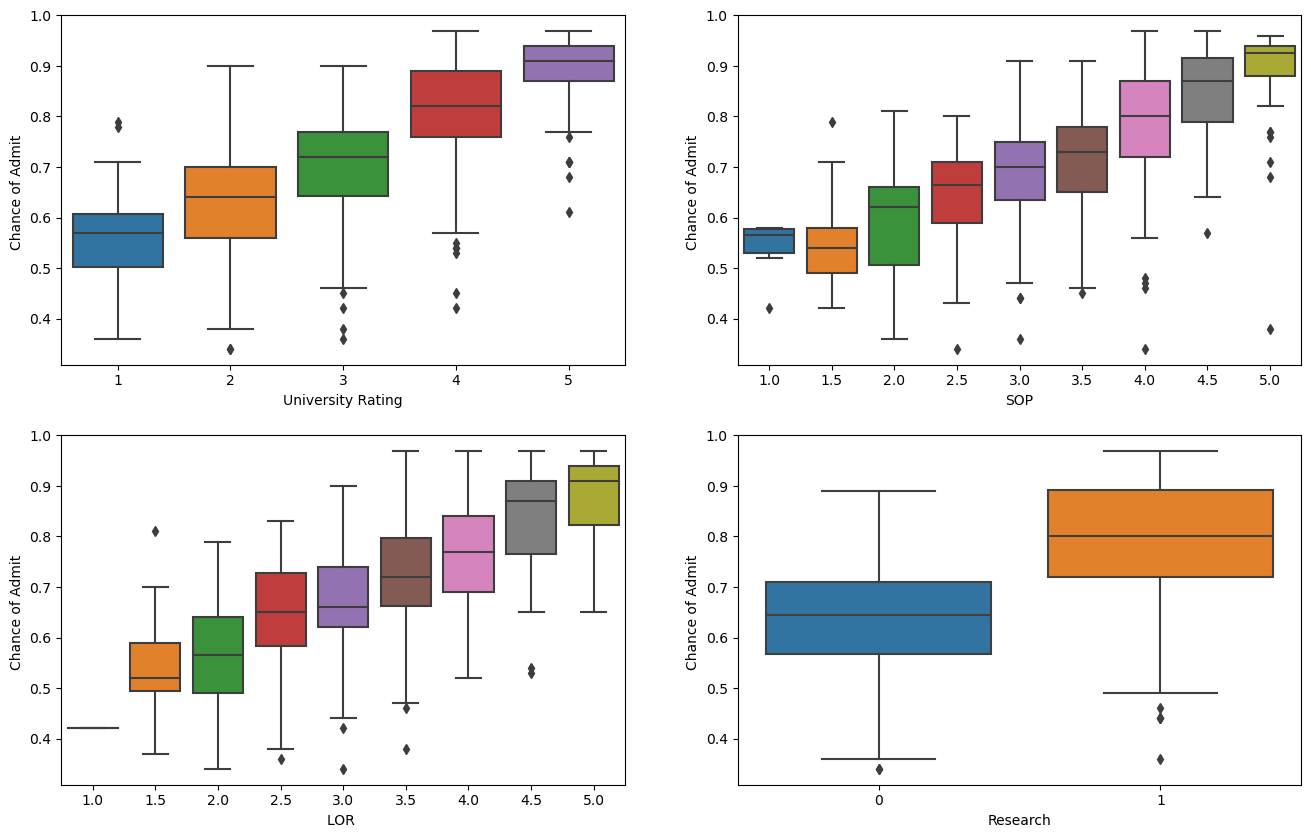

In [15]:
# check relation b/1w Categorical variables & target variable
rows, cols = 2,2
fig, axs = plt.subplots(rows, cols, figsize=(16,10))

index = 0
for row in range(rows):
    for col in range(cols):
        sns.boxplot(x=cat_cols[index], y=target, data=ds, ax=axs[row,col])
        index += 1

### Insights
- From this, we can that as the rating increases the chance of getting an admission also increases.
- Students who have the research experience have more chances of getting an admission as compared to other students who don't have the research experience.

## Multivariate Analysis

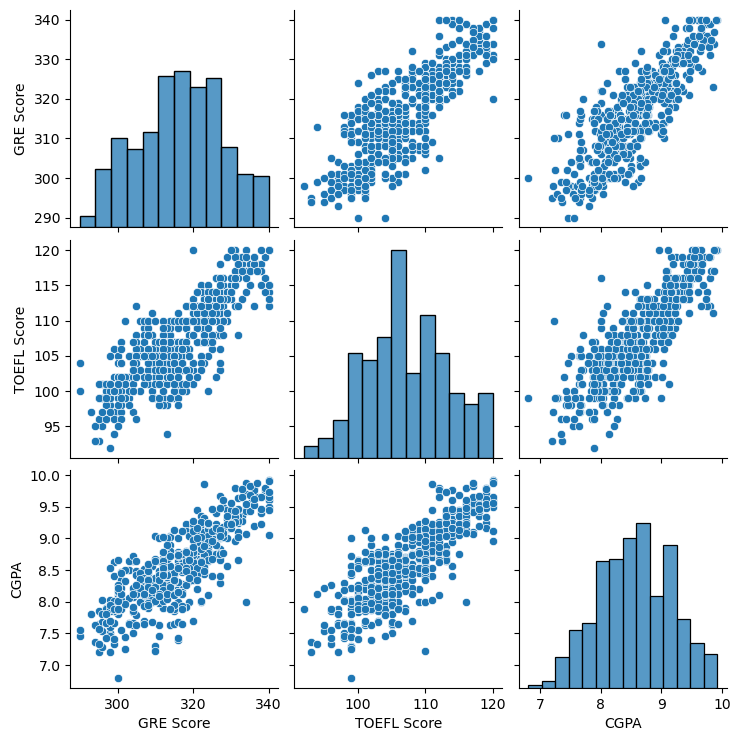

In [16]:
#multivariate analysis
sns.pairplot(ds[num_cols])
plt.show()

## Insights
- Independent continuous variables are also correlated with each other

In [17]:
# Correlation 
ds.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


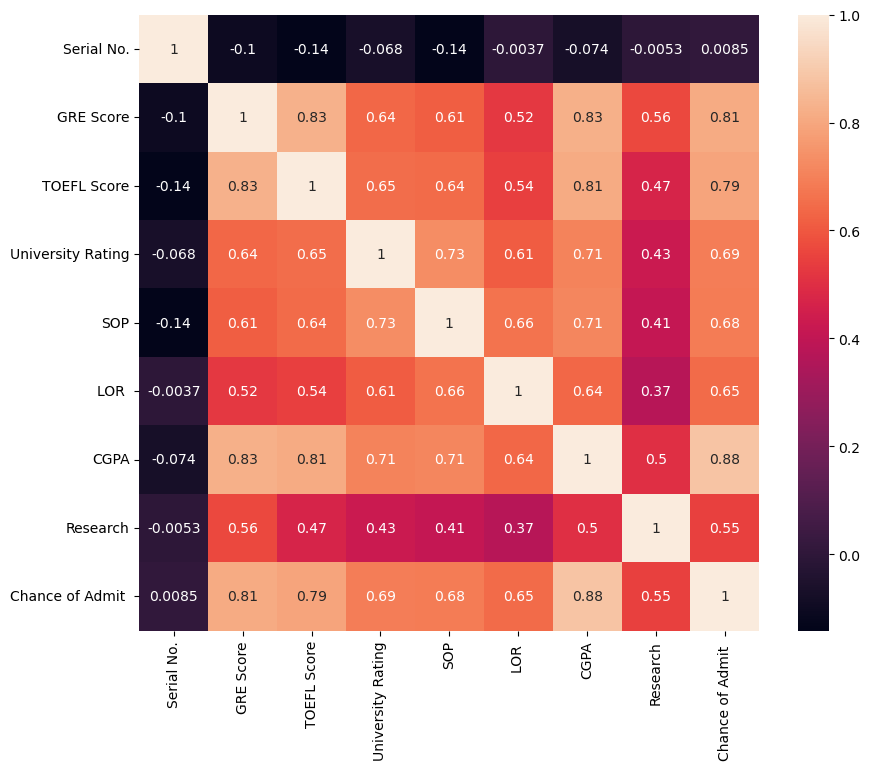

In [18]:
# Heatmap  
plt.figure(figsize=(10,8))
sns.heatmap(ds.corr(), annot=True)
plt.show()

## Data Preprocessing

In [19]:
# dropping unnecessary column
ds = ds.drop(columns=['Serial No.'], axis=1)

In [20]:
ds.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [21]:
# checking the duplicates
ds.duplicated().sum()

0

**Data Preparation for model building**

In [22]:
x = ds.drop(columns=[target])
y = ds[target]

In [23]:
# standardize the dataset
sc = StandardScaler()
x = sc.fit_transform(x)

In [24]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(350, 7) (350,)
(150, 7) (150,)


## Model Building

# LINEAR REGRESSION

## Linear regression  
### y = (w1x1) + (w2x2) .......... (wnxn) + w0
#### x represents the independent variables.
#### y represents the dependent variable.


In [25]:
# calling the linear regression function
li_reg = LinearRegression()
li_reg.fit(x_train,y_train)

LinearRegression()

In [26]:
# Model Coefficients

print(f'The coefficient for linear regression: {li_reg.coef_}')
print()
print(f'The intercept for linear regression: {li_reg.intercept_}')

The coefficient for linear regression: [ 0.01865693  0.02317626  0.01156475 -0.00099944  0.01249708  0.06467088
  0.01396816]

The intercept for linear regression: 0.724978121476996


## Insights
- CGPA feature has a Positive influence on the predicted output
- SOP feature has a negative influence on the predicted output

###  Checking  MAE,  RSME,  R^2   and  Adjusted R^2 for Linear Regression

In [27]:
y_predict = li_reg.predict(x_test)

In [28]:
print('The score of Linear Regression for Training Data:',li_reg.score(x_train,y_train))

print('The score of Linear Regression for Test Data:',li_reg.score(x_test,y_test))

print('Mean Absolute error:',mean_absolute_error(y_true=y_test,y_pred=y_predict)) 

print('Root Mean Squared Error:',mean_squared_error(y_true=y_test,y_pred=y_predict,squared=False))

print('R^2:',r2_score(y_test,y_predict))

print('Adjusted R^2: ',(1 - (1-(r2_score(y_test,y_predict)))*(len(y)-1)/(len(y)-x.shape[1]-1)))

The score of Linear Regression for Training Data: 0.8209843725364346
The score of Linear Regression for Test Data: 0.8157672116057977
Mean Absolute error: 0.043975442403392
Root Mean Squared Error: 0.06423343550447697
R^2: 0.8157672116057977
Adjusted R^2:  0.813146013396937


In [29]:
# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(random_state=1, n_estimators=100)  # Adjust n_estimators as needed

# Train the model
rf_model.fit(x_train, y_train)

# Make predictions
y_pred_train = rf_model.predict(x_train)
y_pred_test = rf_model.predict(x_test)

# Evaluation on Training Data
print('Training Data Performance:')
print('Mean Absolute Error:', mean_absolute_error(y_train, y_pred_train))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('R^2:', r2_score(y_train, y_pred_train))

# Evaluation on Test Data
print('\nTest Data Performance:')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R^2:', r2_score(y_test, y_pred_test))

Training Data Performance:
Mean Absolute Error: 0.01679314285714284
Root Mean Squared Error: 0.023693838861611242
R^2: 0.9700799100247048

Test Data Performance:
Mean Absolute Error: 0.046565999999999934
Root Mean Squared Error: 0.06924922189695225
R^2: 0.7858715271610514


               Model       MAE      RMSE       R^2
0  Linear Regression  0.042673  0.060284  0.825631
1      Random Forest  0.044058  0.063070  0.809145


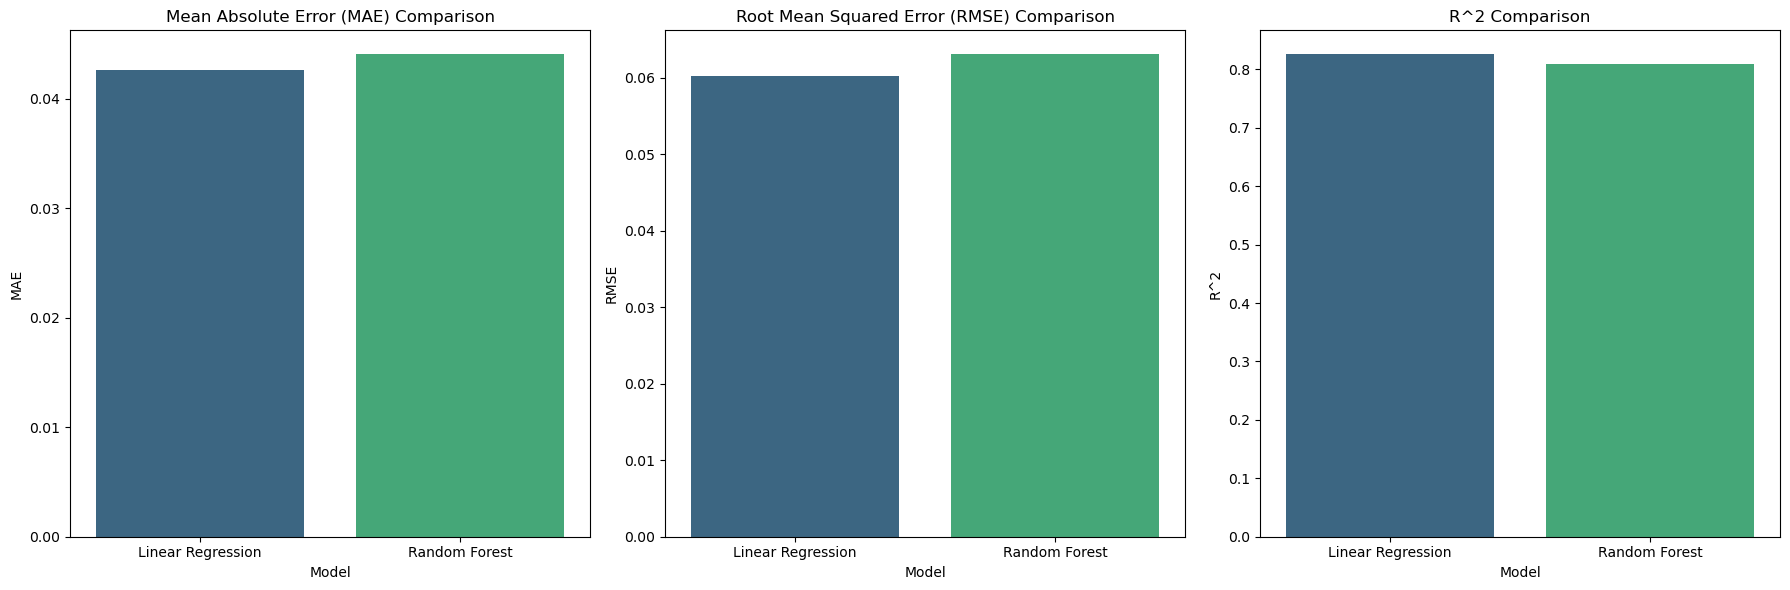

In [30]:
# Assuming your data is loaded into `ds` DataFrame and preprocessed as mentioned
# Example: Dropping target column and separating features
X = ds.drop(columns=['Chance of Admit '])
y = ds['Chance of Admit ']

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict using Linear Regression
y_pred_lin_reg = lin_reg.predict(X_test)

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict using Random Forest
y_pred_rf = rf_model.predict(X_test)

# Calculate performance metrics for Linear Regression
mae_lin_reg = mean_absolute_error(y_test, y_pred_lin_reg)
rmse_lin_reg = np.sqrt(mean_squared_error(y_test, y_pred_lin_reg))
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)

# Calculate performance metrics for Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Create a DataFrame to compare model performance
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MAE': [mae_lin_reg, mae_rf],
    'RMSE': [rmse_lin_reg, rmse_rf],
    'R^2': [r2_lin_reg, r2_rf]
})

# Print the model comparison
print(comparison_df)

# Visualize the model comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# MAE Bar Plot
sns.barplot(x=comparison_df['Model'], y=comparison_df['MAE'], ax=axes[0], palette='viridis')
axes[0].set_title('Mean Absolute Error (MAE) Comparison')

# RMSE Bar Plot
sns.barplot(x=comparison_df['Model'], y=comparison_df['RMSE'], ax=axes[1], palette='viridis')
axes[1].set_title('Root Mean Squared Error (RMSE) Comparison')

# R^2 Bar Plot
sns.barplot(x=comparison_df['Model'], y=comparison_df['R^2'], ax=axes[2], palette='viridis')
axes[2].set_title('R^2 Comparison')

plt.tight_layout()
plt.show()


## LINEAR REGRESSION ASSUMPTIONS TESTING



### a) Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5) 


In [31]:
col = ds[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA','Research']]
x1 = np.array(x_train)
vif = []
for i in range(x1.shape[1]):
    vif.append(round(variance_inflation_factor(x1, i),2))
vif_score= pd.DataFrame({'Columns':['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA','Research'],
                       'VIF score':vif})
    

In [32]:
print(vif_score)

             Columns  VIF score
0          GRE Score       4.49
1        TOEFL Score       4.15
2  University Rating       2.99
3                SOP       2.96
4               LOR        2.03
5               CGPA       4.63
6           Research       1.53


## Insights:-

    It can be observed that every column has a VIF less than 5.
    
##### Hence, there is no multicollinearity among the independent variables.

- The  'Research' has the lowest VIF score of 1.53, indicating that it has the least correlation with the other  predictor variables.
- This means that 'Research' provides unique information that is not highly correlated with the information provided by the other variables.
- 'CGPA' has the highest VIF score of 4.63, suggesting a relatively higher correlation with the other predictor variables compared to the rest.

### b) The mean of residuals is nearly zero

In [33]:
normal = y_test - y_predict
print('Mean of Residuals:',(sum(np.array(normal)/len(normal))))

Mean of Residuals: -0.00819373825665452


## Insights

- suggests a slight underestimation in the model's predictions on average. While this indicates a generally unbiased model.

### c) Linearity of variables
  - It is quite clear from EDA that independent variables are linearly dependent on the target variables

### d) Test for Homoscedasticity 

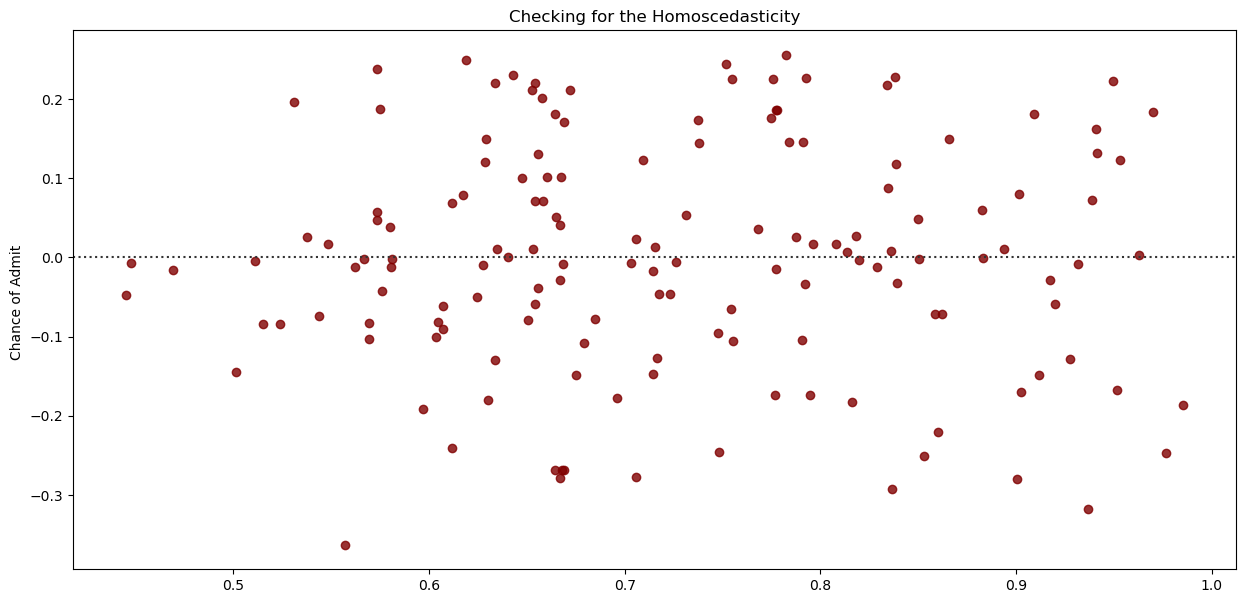

In [34]:
plt.figure(figsize=(15,7))
sns.residplot(x=y_predict,y=normal,color='maroon')
plt.title('Checking for the Homoscedasticity')
plt.show() 

## Insights

- No discernible pattern at y=0 in the residual plot indicates homoscedasticity, ensuring the model's errors have a consistent spread across predicted values, implying stable and reliable performance.

### e) Normality of residuals (almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line) 

In [35]:
normal = y_test - y_predict
normal.head()

361    0.277197
73     0.130549
374   -0.546701
155    0.038539
104   -0.078033
Name: Chance of Admit , dtype: float64

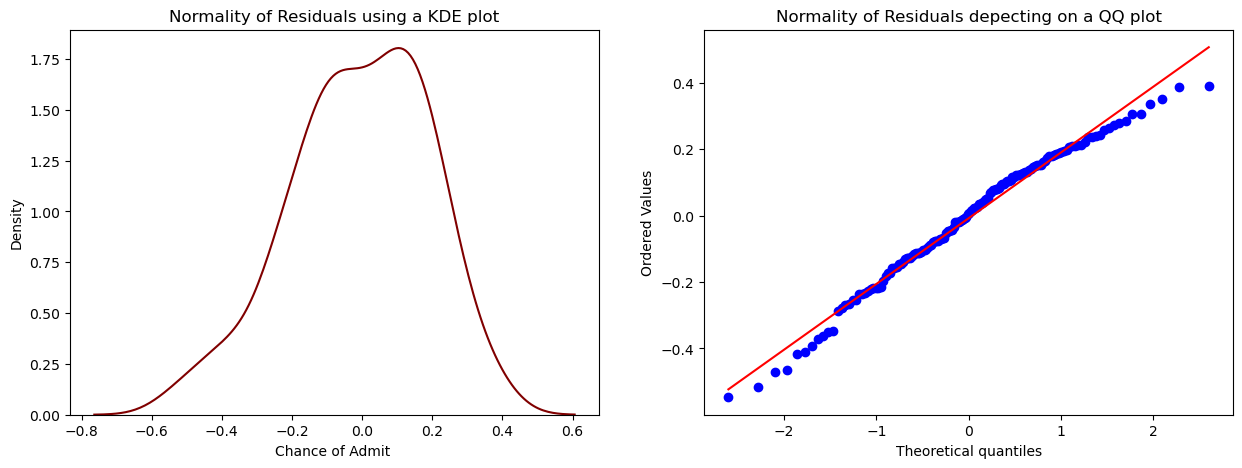

In [36]:
# qq-plot and kde plot of residuals
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
sns.kdeplot(x=normal,color='maroon')
plt.title('Normality of Residuals using a KDE plot')

ax = fig.add_subplot(1,2,2)
sp.stats.probplot(normal,plot=plt)
plt.title('Normality of Residuals depecting on a QQ plot')
plt.show()

## Insights

-  The KDE plot resembles a bell-shaped curve (i.e., approximately normal distribution), it suggests that the residuals follow a normal distribution.
- Area of high density(i.e., CGPA) indicate where the majority of residuals are clustered.

- The points in a QQ plot lie approximately along the diagonal line, it indicates that the data closely follows the normal distribution.
- The QQ plot confirms the normality of residuals, as the majority of points are aligned with the diagonal line.